# Feature Exploration of Titanic Data

## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Feature EDA

In [5]:
train['Sex'].value_counts() 

male      577
female    314
Name: Sex, dtype: int64

In [12]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
train[train['Sex']=='male']['Survived'].sum()

109

In [11]:
train[train['Sex']=='female']['Survived'].sum()

233

In [16]:
for i in range(1,4):
    print(i,train[train['Pclass']==i]['Survived'].sum(), train[train['Pclass']==i].shape[0])

1 136 216
2 87 184
3 119 491


In [20]:
train['Age'].isnull().sum()

177

In [23]:
train[~train['Age'].isnull()]['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [36]:
train[train['Age'].isnull()]['Pclass'].value_counts()

3    136
1     30
2     11
Name: Pclass, dtype: int64

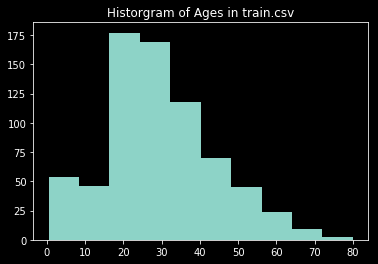

In [7]:
plt.hist(train[~train['Age'].isnull()]['Age'])
plt.title('Historgram of Ages in train.csv')
plt.show()

### Examining survivorship by age

In [25]:
(train['Age'] < 10).sum()

62

In [26]:
train[train['Age']<10]['Survived'].sum()

38

In [9]:
for i in range(10,90,10):
    total = ((train['Age']>=i-10) & (train['Age']<i)).sum()
    survivors = train[(train['Age']>=i-10) & (train['Age']<i)]['Survived'].sum()
    print(f'For age range {i-10} to {i}, {survivors/total} survived')

For age range 0 to 10, 0.6129032258064516 survived
For age range 10 to 20, 0.4019607843137255 survived
For age range 20 to 30, 0.35 survived
For age range 30 to 40, 0.437125748502994 survived
For age range 40 to 50, 0.38202247191011235 survived
For age range 50 to 60, 0.4166666666666667 survived
For age range 60 to 70, 0.3157894736842105 survived
For age range 70 to 80, 0.0 survived


In [39]:
for i in range(5,25,5):
    total = ((train['Age']>=i-5) & (train['Age']<i)).sum()
    survivors = train[(train['Age']>=i-5) & (train['Age']<i)]['Survived'].sum()
    print(f'For age range {i-5} to {i}, {survivors/total} survived')

For age range 0 to 5, 0.675 survived
For age range 5 to 10, 0.5 survived
For age range 10 to 15, 0.4375 survived
For age range 15 to 20, 0.3953488372093023 survived


## Feature Creation for Modeling

In [40]:
train['over_60'] = train['Age'].apply(lambda x: 1 if x >=60 else 0)
train['under_10'] = train['Age'].apply(lambda x: 1 if x <=10 else 0)

In [41]:
train['is_male'] = train['Sex'].apply(lambda x: 1 if x == 'male' else 0)